In [45]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import yfinance as yf
import numpy as np
import pandas as pd
from pylab import plt, mpl

In [47]:
# Plot Style
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<ipython-input-47-01adf45c7166>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [48]:
BTC = yf.download("BTC-USD", start = "2010-01-04", end = "2023-03-24")

[*********************100%***********************]  1 of 1 completed


In [49]:
BTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [50]:
BTC.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-19,26969.503906,28440.560547,26907.716797,28038.675781,28038.675781,37769448859
2023-03-20,28041.601562,28527.724609,27242.880859,27767.236328,27767.236328,44774027664
2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,28175.816406,36102192830
2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,27307.437500,33382021890
2023-03-23,27301.957031,28729.843750,27183.363281,28333.972656,28333.972656,24220433689


In [51]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3110 entries, 2014-09-17 to 2023-03-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3110 non-null   float64
 1   High       3110 non-null   float64
 2   Low        3110 non-null   float64
 3   Close      3110 non-null   float64
 4   Adj Close  3110 non-null   float64
 5   Volume     3110 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 170.1 KB


In [52]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-03-19,26969.503906,28440.560547,26907.716797,28038.675781,28038.675781,37769448859
2023-03-20,28041.601562,28527.724609,27242.880859,27767.236328,27767.236328,44774027664
2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,28175.816406,36102192830


In [53]:
BTC = BTC.Close.to_frame()

In [54]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

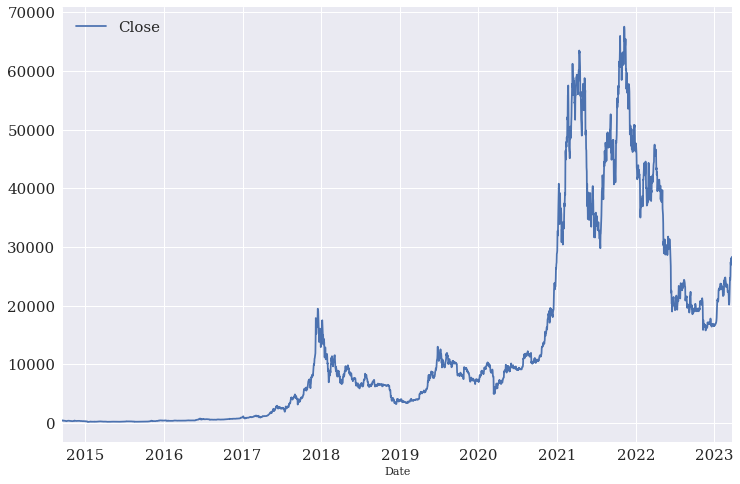

In [55]:
ax = BTC.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [56]:
BTC['rets'] = np.log(BTC / BTC.shift(1))

In [57]:
# Calculate Volatility
BTC['vola'] = BTC['rets'].rolling(252).std() * np.sqrt(252)

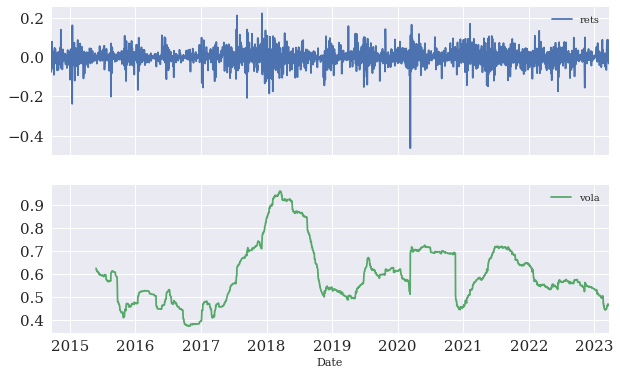

In [58]:
BTC[['rets', 'vola']].plot(subplots=True, figsize=(10, 6), fontsize= 15);